# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
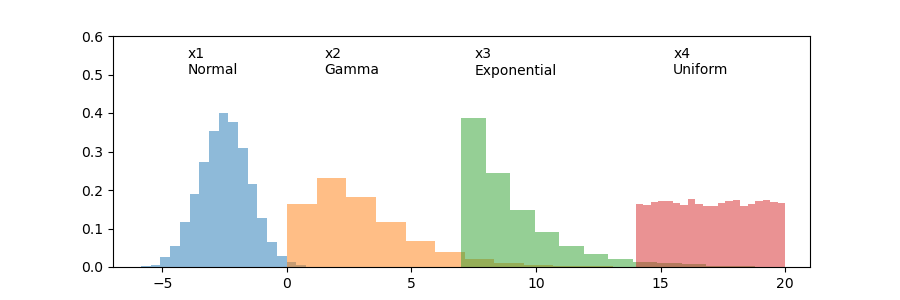

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

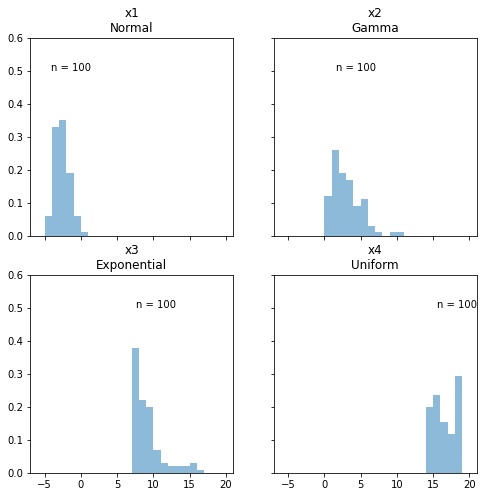

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
import matplotlib.animation as animation

# Use an inline backend for animations to avoid errors
%matplotlib inline

n = 1000
step = 100

# Generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n) + 7
x4 = np.random.uniform(14, 20, n)

samples = {
    'X1': {'data': x1, 'label': 'x1\nNormal'},
    'X2': {'data': x2, 'label': 'x2\nGamma'},
    'X3': {'data': x3, 'label': 'x3\nExponential'},
    'X4': {'data': x4, 'label': 'x4\nUniform'}
}

graphScale = 4
samplesCount = len(samples)
columnsCount = 2
rowsCount = ceil(samplesCount / columnsCount)

# Set up the subplots
fig, axs = plt.subplots(rowsCount, columnsCount, figsize=(columnsCount * graphScale, rowsCount * graphScale), sharex=True, sharey=True)
axs = axs.flatten()  # Flatten the axes array for easy indexing

def update(cur):
    # Check if animation is at the last frame, and if so, stop the animation
    itemsCount = (cur + 1) * step
    if itemsCount >= n: 
        ani.event_source.stop()

    for i, info in enumerate(samples.values()):
        axs[i].clear()
        bins = np.arange(-5, 20, 1)  # Set bin size for histograms
        axs[i].hist(info['data'][:itemsCount], density=True, bins=bins, alpha=0.5)
        axs[i].axis([-7, 21, 0, 0.6])
        axs[i].set_title(info['label'])
        axs[i].text(info['data'][:itemsCount].mean() - 1.5, 0.5, f'n = {itemsCount}')

# Use an animation object
ani = animation.FuncAnimation(fig, update, frames=ceil(n / step), interval=100)